<a href="https://colab.research.google.com/github/SrijanDawn/LSTM_Improved_model-diff_dataset-/blob/main/Copy_of_LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [ ]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('TCS.NS')
df=data
df.head()

/tmp/ipython-input-1794888428.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, START, TODAY)
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,295.397430,298.246670,294.375620,296.635362,1963682
1,2010-01-05,295.476135,298.502231,293.393246,296.714091,2014488
2,2010-01-06,288.795013,295.613554,288.067976,295.475990,3349176
3,2010-01-07,280.758240,290.583206,279.422035,289.050502,6474892
4,2010-01-08,275.020386,282.369464,273.723495,281.386967,6048178


In [ ]:
# Check available columns
print("Columns before dropping:", df.columns)

# List of columns you want to drop
cols_to_drop = ['Date', 'Adj Close']

# Drop only those that exist
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
df = df.drop(existing_cols_to_drop, axis=1)

# Show first few rows
print("Columns after dropping:", df.columns)
print(df.head())


Columns before dropping: MultiIndex([(  'Date',       ''),
            ( 'Close', 'TCS.NS'),
            (  'High', 'TCS.NS'),
            (   'Low', 'TCS.NS'),
            (  'Open', 'TCS.NS'),
            ('Volume', 'TCS.NS')],
           names=['Price', 'Ticker'])
Columns after dropping: MultiIndex([( 'Close', 'TCS.NS'),
            (  'High', 'TCS.NS'),
            (   'Low', 'TCS.NS'),
            (  'Open', 'TCS.NS'),
            ('Volume', 'TCS.NS')],
           names=['Price', 'Ticker'])
Price        Close        High         Low        Open   Volume
Ticker      TCS.NS      TCS.NS      TCS.NS      TCS.NS   TCS.NS
0       295.397430  298.246670  294.375620  296.635362  1963682
1       295.476135  298.502231  293.393246  296.714091  2014488
2       288.795013  295.613554  288.067976  295.475990  3349176
3       280.758240  290.583206  279.422035  289.050502  6474892
4       275.020386  282.369464  273.723495  281.386967  6048178


/tmp/ipython-input-2560777674.py:9: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(existing_cols_to_drop, axis=1)


Visualizing Closing Price

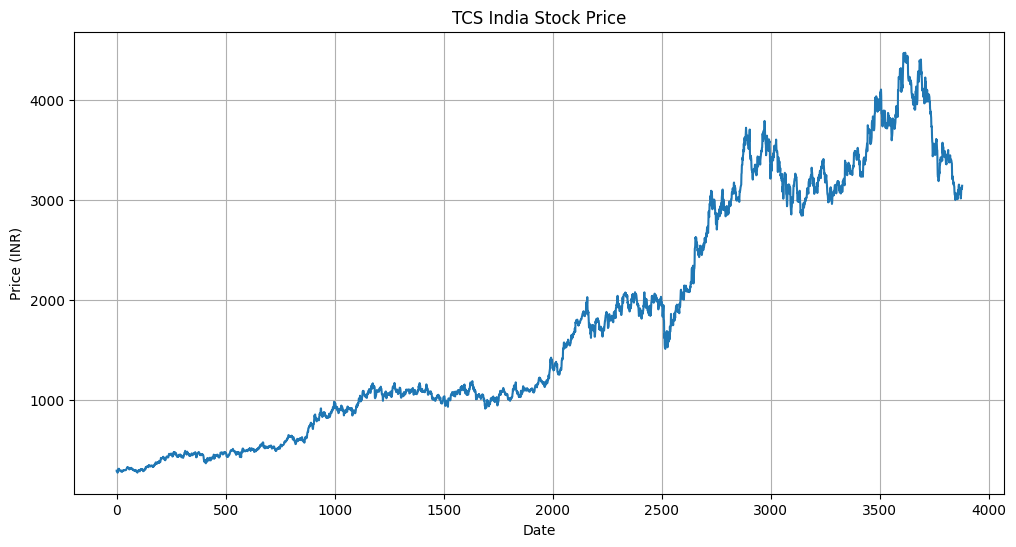

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,295.397430,298.246670,294.375620,296.635362,1963682
1,295.476135,298.502231,293.393246,296.714091,2014488
2,288.795013,295.613554,288.067976,295.475990,3349176
3,280.758240,290.583206,279.422035,289.050502,6474892
4,275.020386,282.369464,273.723495,281.386967,6048178
...,...,...,...,...,...
3873,3110.000000,3122.699951,3053.399902,3056.399902,2079428
3874,3124.199951,3139.000000,3110.100098,3139.000000,2263446
3875,3133.399902,3148.699951,3121.000000,3144.000000,1447167


# Plotting moving averages of 100 day

---



In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3873,3285.792251
3874,3284.293364
3875,3281.912468
3876,3279.429185


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

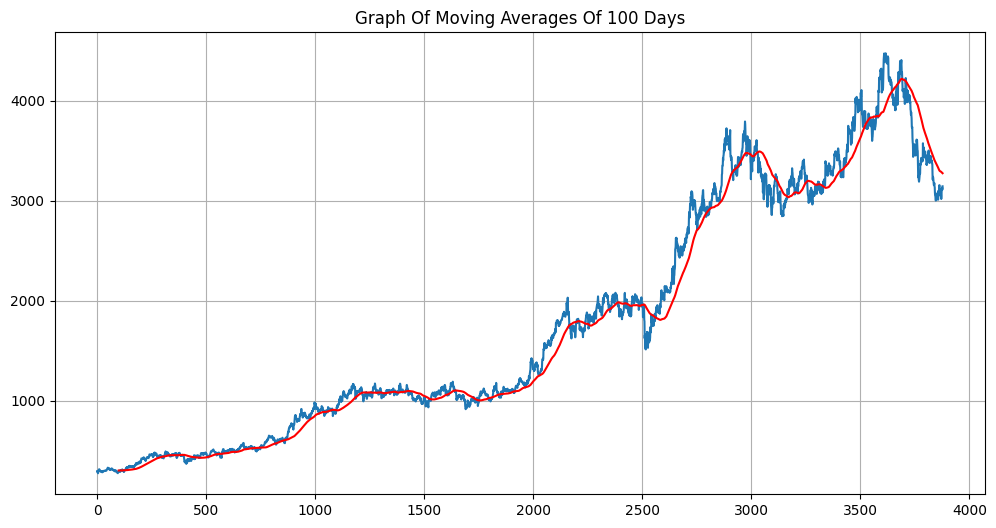

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3873,3580.195951
3874,3574.554531
3875,3568.773838
3876,3562.984934


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

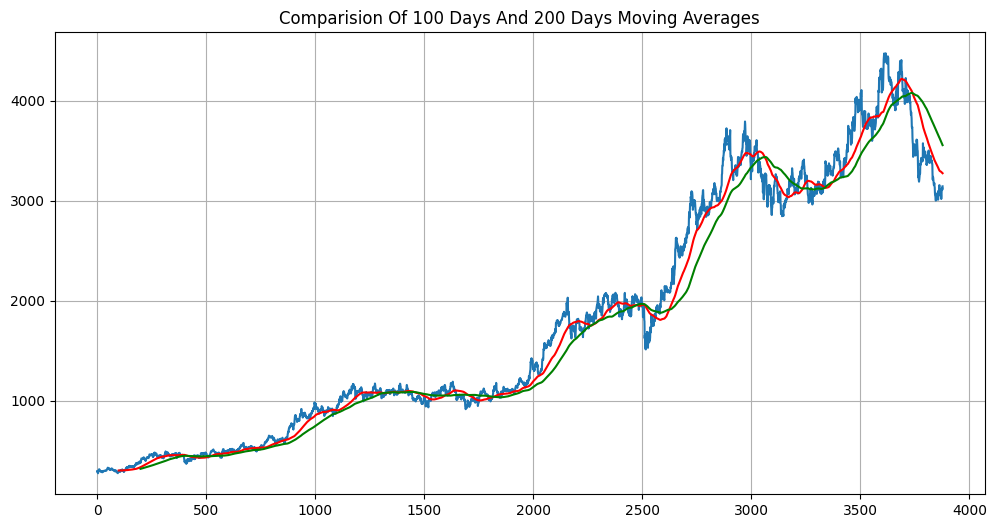

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
df.shape

(3878, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2714, 6)
(1164, 6)


In [ ]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,295.397430,298.246670,294.375620,296.635362,1963682
1,2010-01-05,295.476135,298.502231,293.393246,296.714091,2014488
2,2010-01-06,288.795013,295.613554,288.067976,295.475990,3349176
3,2010-01-07,280.758240,290.583206,279.422035,289.050502,6474892
4,2010-01-08,275.020386,282.369464,273.723495,281.386967,6048178


In [ ]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2714,2021-01-04,2838.342285,2848.894657,2746.359617,2754.810862,5113293
2715,2021-01-05,2888.348877,2908.192852,2838.482227,2838.482227,5801309
2716,2021-01-06,2849.595215,2907.492938,2836.241339,2894.886176,3726716
2717,2021-01-07,2832.132324,2877.003102,2801.735976,2871.540081,3717827
2718,2021-01-08,2914.403076,2921.033390,2857.532664,2885.547690,5879039


# Using MinMax scaler for normalization of the dataset

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.00810379],
       [0.00813574],
       [0.00763318],
       ...,
       [1.        ],
       [0.9869602 ],
       [0.97937902]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2614, 100, 1)

# ML Model (LSTM)

---



In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - loss: 0.0523 - mean_absolute_error: 0.1603
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0060 - mean_absolute_error: 0.0536
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0054 - mean_absolute_error: 0.0502
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0045 - mean_absolute_error: 0.0457
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0050 - mean_absolute_error: 0.0488
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0037 - mean_absolute_error: 0.0419
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0038 - mean_absolute_error: 0.0406
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0032 - mean_absolute_error: 0.0380
Epoch 9/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0037 - mean_absolute_error: 0.0395
Epoch 10/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0033 - mean_absolute_error: 0.0377
Epoch 11/100
82/82 ━━━━━━━━

In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(1164, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [ ]:
# final_df = past_100_days.append(test_df, ignore_index = True)
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,2127.867465
1,2113.593855
2,2117.312780
3,2104.294513
4,2104.108985


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01861115],
       [0.0127025 ],
       [0.01424197],
       ...,
       [0.43924546],
       [0.43510589],
       [0.43262216]])

In [ ]:
input_data.shape

(1264, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1164, 100, 1)
(1164,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step


In [ ]:
y_pred.shape

(1164, 1)

In [ ]:
y_test

array([0.27813822, 0.3127745 , 0.33612326, ..., 0.43924546, 0.43510589,
       0.43262216])

In [ ]:
y_pred

array([[0.31475395],
       [0.3173953 ],
       [0.3199522 ],
       ...,
       [0.42158023],
       [0.42261204],
       [0.42797685]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00041396])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

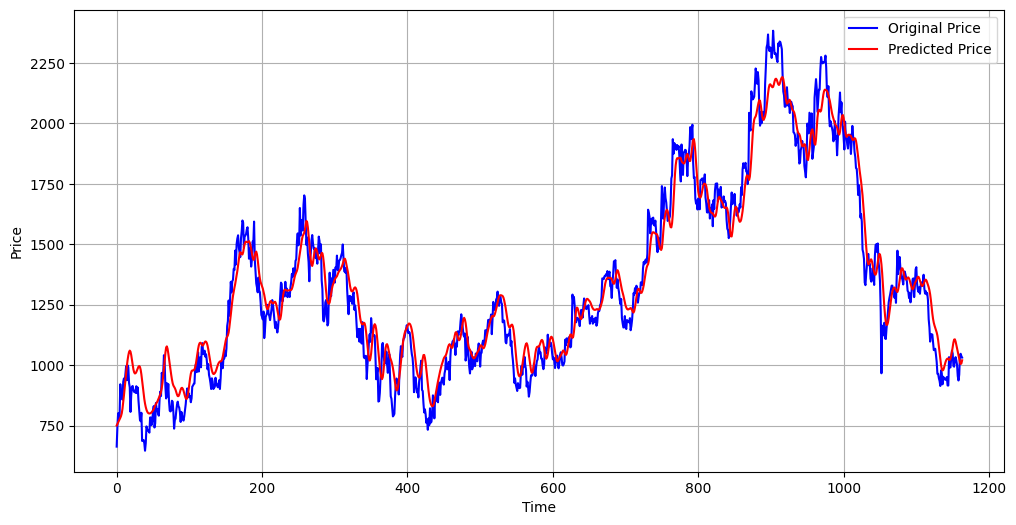

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 5.34%


Calculation of R2 score

In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9475119150120366


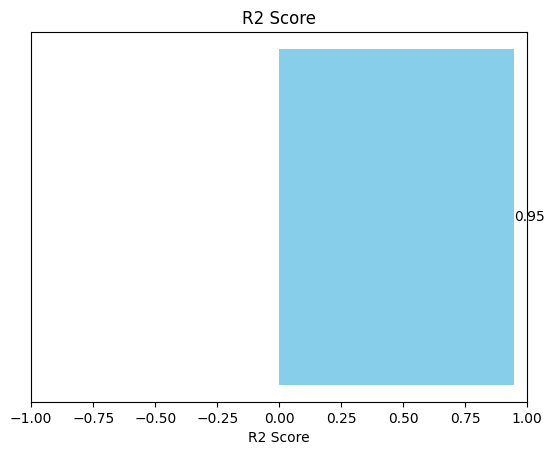

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

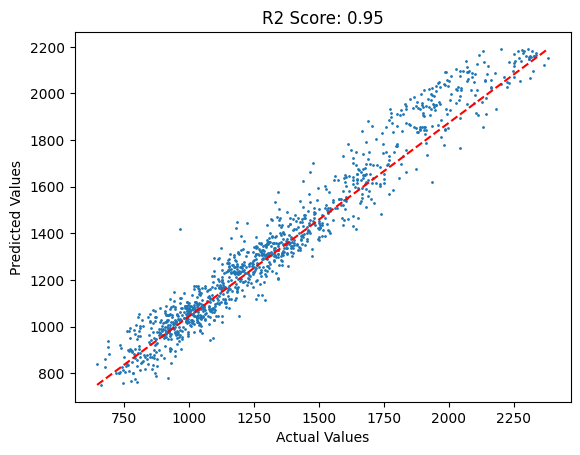

In [ ]:
plt.scatter(actual, predicted, s=1)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()